<a href="https://colab.research.google.com/github/clwilkinson7/Temp/blob/main/Assignment1_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

---


Week beginning 30/09/2024

Imports


In [4]:
from google.colab import files

uploaded = files.upload()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import csv
from sklearn.preprocessing import PolynomialFeatures

Saving housePrice.csv to housePrice.csv


Opening CSV file


> Using basic file opening methods



Creating lists to store the data in


> Manually creating a list for each column in the CSV file






In [5]:
houseprice = open("housePrice.csv", "r")

file = csv.DictReader(houseprice)

price = []
price2 = []
sqrFt = []
longitude = []
latitude = []
lotSize = []
beds = []
bathrooms = []
yearBuilt = []
pricePerSqrFt = []
yearLastSold = []
priceLastSold = []
address = []
city = []
state = []
zipcode = []
fullAddress = []

Using a for loop to iterate through all columns in the CSV file I appended every item in each colum to the assotiated list, whilst adding values of 0 in place of errors

In [ ]:
count = 0
for col in file:
    price2.append(col["Price"])
    if "$" in col["Price"]:
        if "/mo" not in col["Price"]:
            price.append(col["Price"])
        else:
            price.append("0$,+")
    else:
        price.append("0$,+")

    #sqrFt.append(col["Sqr Ft"])
    #longitude.append(col["Longitude"])
    #latitude.append(col["Latitude"])

    if col["Beds"] != "":
        beds.append((float(col["Beds"])))
    else:
        beds.append(0)

    if col["Bath"] != "":
        bathrooms.append(float((col["Bath"])))
    else:
        bathrooms.append(0)
    count+= 1
    #yearBuilt.append(col["Year Built"])
    #pricePerSqrFt.append(col["Price Sqr Ft"])
    #yearLastSold.append(col["Last Sold Year"])
    #priceLastSold.append(col["Last Sold For"])
    #address.append(col["Address"])
    #city.append(col["City"])
    #state.append(col["State"])
    #zipcode.append(col["Zipcode"])
    #fullAddress.append(col["Address Full"])

This for loop is to manage all the uncessary data in the price list

In [ ]:
issues = ["$", ",", "+"]

count = 0
for value in price:
    for issue in issues:
        value = value.replace(issue, "")
    price[count] = float(value)
    count += 1

For plotting the data I set the y-axis to the highest value in the price list and for the x-axis I placed the highest between

In [ ]:
yAxis = max(price)

if max(bathrooms) > max(beds):
    xAxis = max(bathrooms)
else:
    xAxis = max(beds)

The generate the plot points

In [ ]:
m2 = len(bathrooms)
X2 = [[]]
y2 = [[]]
for i in range(m2):
    X2[0].append(bathrooms[i])
    y2[0].append(float(X2[0][i]) + float(price[i]))

For plotting the data

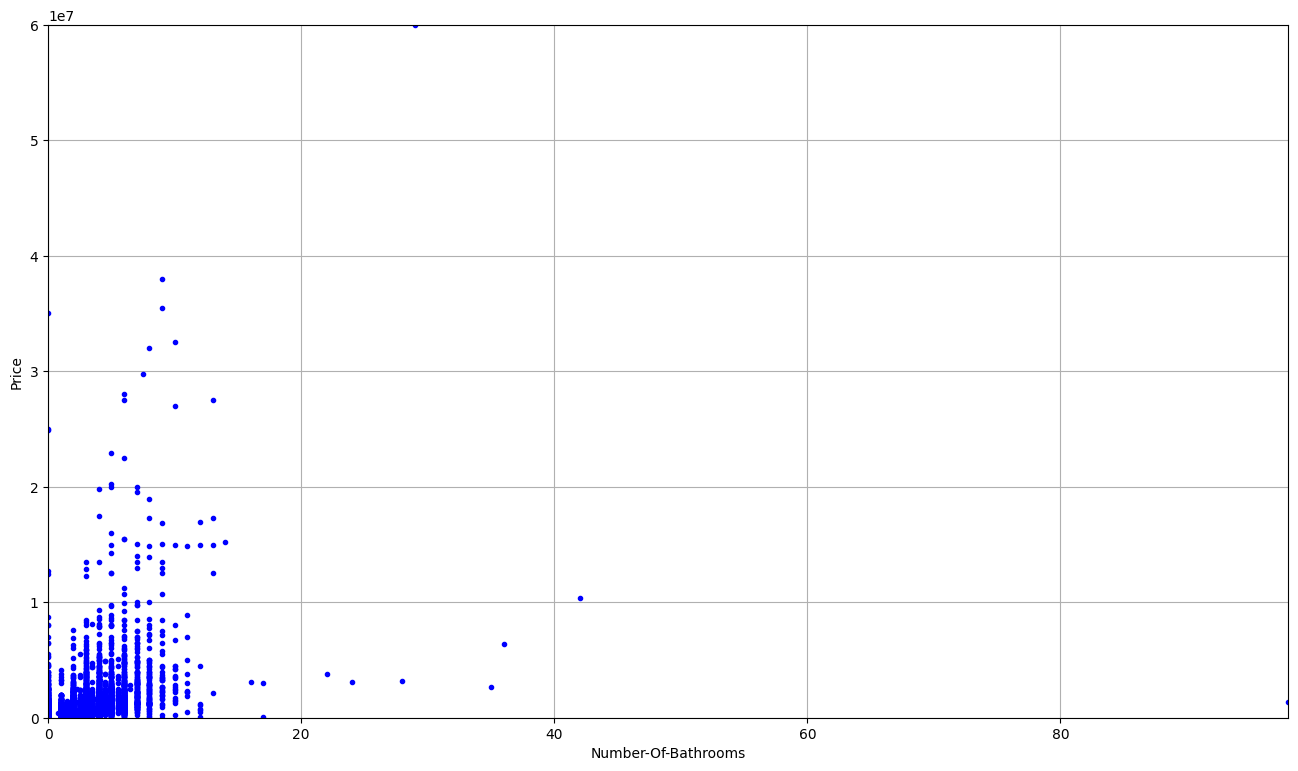

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(X2, y2, "b.")
plt.xlabel("Number-Of-Bathrooms")
plt.ylabel("Price", rotation=90)
plt.axis([0, xAxis, 0, yAxis])
plt.grid()
plt.show()